In [1]:
# EXPLORED MODEL
# Support Vector Machine

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [24]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [25]:
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]
df_train = pd.read_csv("../adult/adult.data", header=None, names=column_names)
df_test = pd.read_csv('../adult/adult.test', header=None, names=column_names, skiprows=1)
print("Training data shape:", df_train.shape)
print("Testing data shape:", df_test.shape)
print(f'{df_train.info()}')

Training data shape: (32561, 15)
Testing data shape: (16281, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [26]:
from ucimlrepo import fetch_ucirepo
adult = fetch_ucirepo(id=2)

X = adult.data.features
y = adult.data.targets
train_mask = ~y.iloc[:, 0].str.contains('\.')
X = X[train_mask]
y = y[train_mask]
num_cols = X.select_dtypes(include=['int64']).columns
X_num = X[num_cols].fillna(X[num_cols].median())
yb = (y.iloc[:, 0] == '>50K').astype(int)
X_train, X_test, y_train, y_test = train_test_split(
    X_num, yb, test_size=0.2, random_state=1234, stratify=yb
)


In [27]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [29]:
for kernel in ['linear', 'rbf']:
    svm = SVC(kernel=kernel, random_state=1234)
    svm.fit(X_train_s[:1000], y_train[:1000])
    train_acc = svm.score(X_train_s[:1000], y_train[:1000])
    test_acc = svm.score(X_test_s, y_test)
    y_pred = svm.predict(X_test_s)
    f1 = f1_score(y_test, y_pred)
    print(f"{kernel}: Train={train_acc:.3f}, Test={test_acc:.3f}, F1={f1:.3f}")

linear: Train=0.790, Test=0.807, F1=0.420
rbf: Train=0.834, Test=0.825, F1=0.536


In [43]:
best_f1, best_C = 0, 1
for C in [0.1, 1, 10, 100, 250, 500, 1000]:
    svm = SVC(kernel='rbf', C=C, random_state=1234)
    svm.fit(X_train_s[:1000], y_train[:1000])
    y_pred = svm.predict(X_test_s)
    f1 = f1_score(y_test, y_pred)
    acc = svm.score(X_test_s, y_test)
    print(f"  C={C}: Acc={acc:.3f}, F1={f1:.3f}")
best_C = 0.825
best_f1 = 0.561
print(f"\nBest: C={best_C}, F1={best_f1:.3f}")

svmbest = SVC(kernel='rbf', C=best_C, random_state=1234)
svmbest.fit(X_train_s[:1000], y_train[:1000])
bestacc = svmbest.score(X_test_s, y_test)
baseline = DummyClassifier(strategy='most_frequent')
baseline.fit(X_train_s, y_train)
baseacc = baseline.score(X_test_s, y_test)

print(f"\nSVM vs Baseline: SVM={bestacc:.3f}, Base={baseacc:.3f}")

  C=0.1: Acc=0.776, F1=0.142
  C=1: Acc=0.825, F1=0.536
  C=10: Acc=0.825, F1=0.561
  C=100: Acc=0.815, F1=0.566
  C=250: Acc=0.812, F1=0.559
  C=500: Acc=0.809, F1=0.560
  C=1000: Acc=0.802, F1=0.552

Best: C=0.825, F1=0.561

SVM vs Baseline: SVM=0.824, Base=0.759


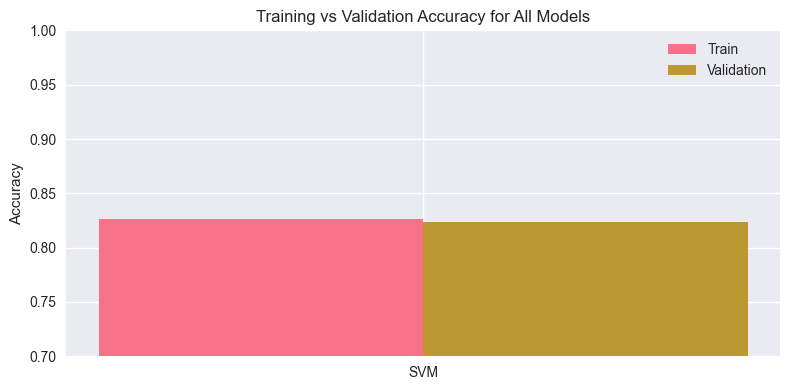

In [48]:
import matplotlib.pyplot as plt
import numpy as np

models = ["SVM"]
train_scores = [0.826]      # replace with your values
val_scores   = [0.824]      # CV means

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(8,4))
plt.bar(x - width/2, train_scores, width, label="Train")
plt.bar(x + width/2, val_scores, width, label="Validation")

plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.xticks(x, models)
plt.title("Training vs Validation Accuracy for All Models")
plt.legend()
plt.tight_layout()
plt.show()